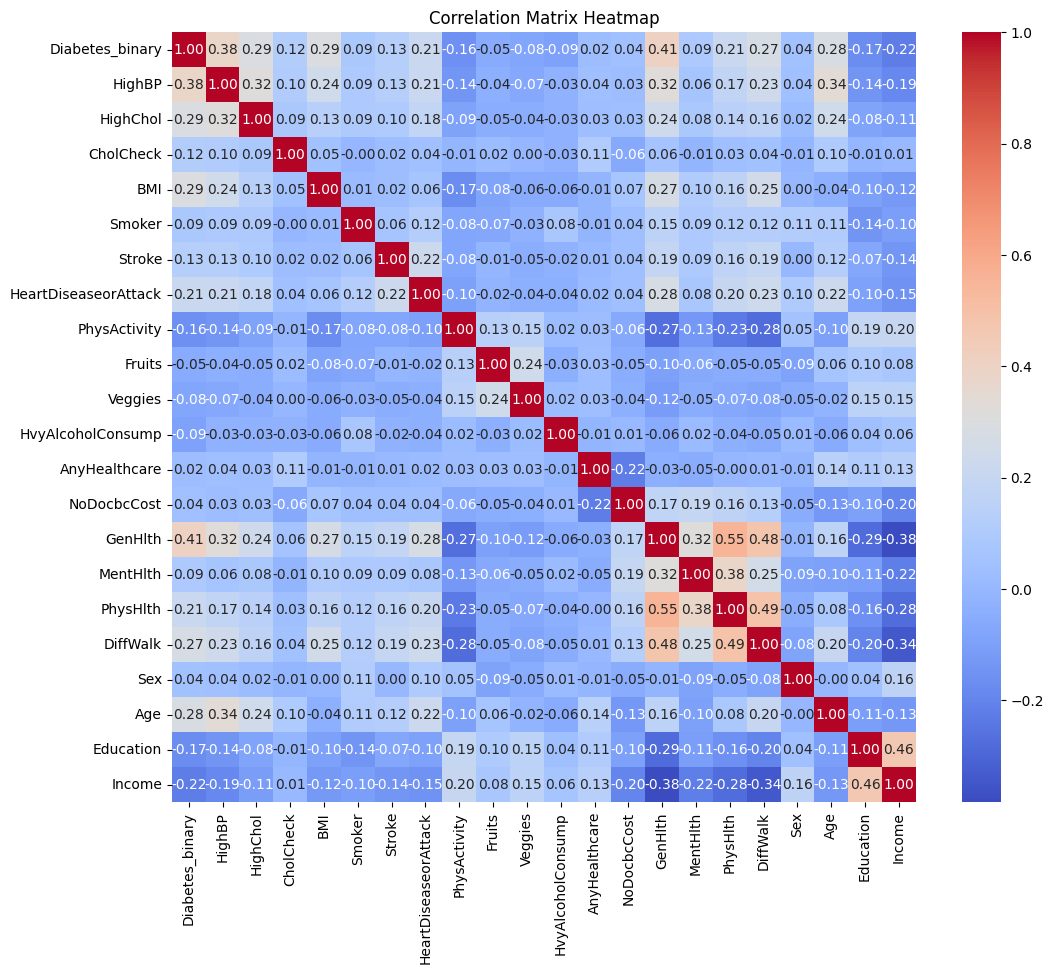

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W' #5050, cleaned
# Read CSV
df = pd.read_csv(url)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Optional: Make plot bigger for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



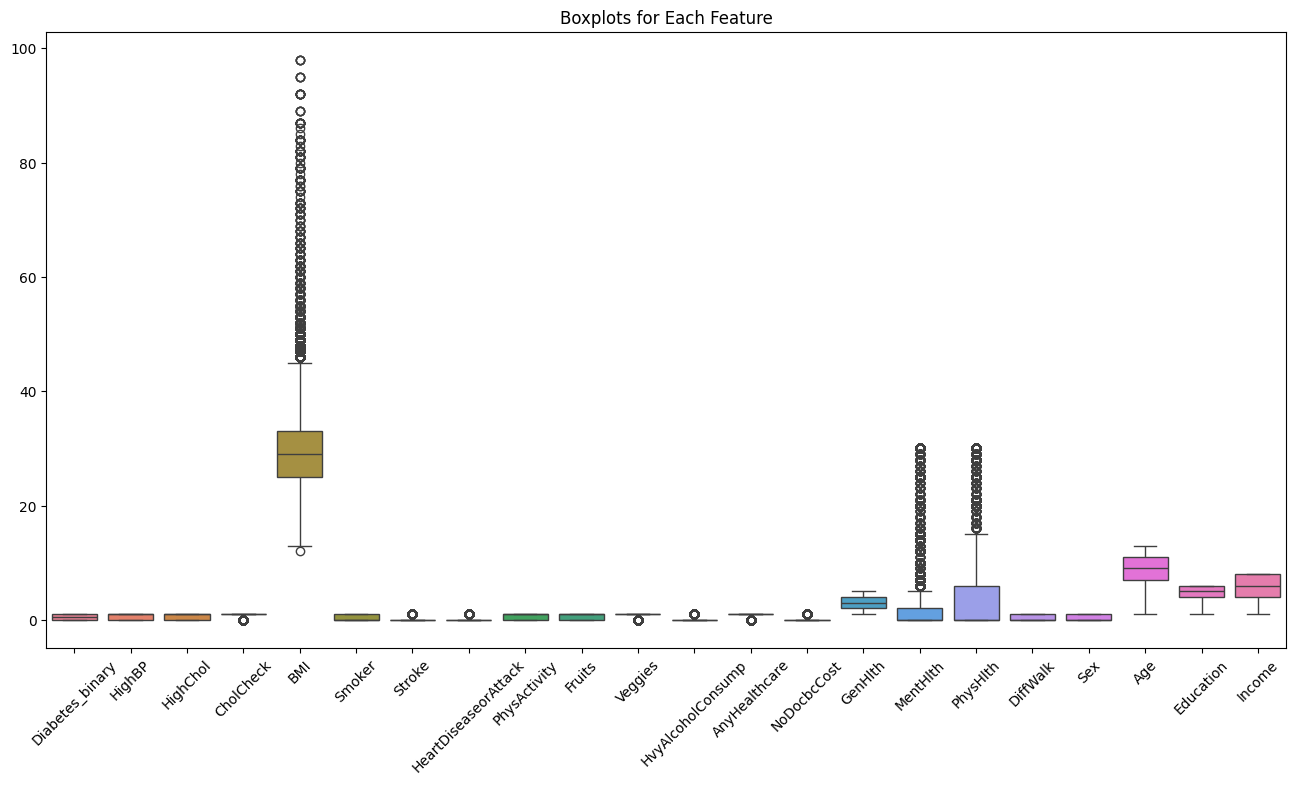

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct downloadable link
#rl = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
# Read CSV
df = pd.read_csv(url)

# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature')
plt.show()


In [ ]:
# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:\n", Q1)
print("\nQ2 (Median):\n", Q2)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]

print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Binary columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Continuous columns: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Q1:
 BMI          25.0
GenHlth       2.0
MentHlth      0.0
PhysHlth      0.0
Age           7.0
Education     4.0
Income        4.0
Name: 0.25, dtype: float64

Q2 (Median):
 BMI          29.0
GenHlth       3.0
MentHlth      0.0
PhysHlth      0.0
Age           9.0
Education     5.0
Income        6.0
Name: 0.5, dtype: float64

Q3:
 BMI          33.0
GenHlth       4.0
MentHlth      2.0
PhysHlth      6.0
Age          11.0
Education     6.0
Income        8.0
Name: 0.75, dtype: float64

IQR:
 BMI          8.0
GenHlth      2.0
MentHlth     2.0
PhysHlth     6.0
Age          4.0
Education    2.0
Income       4.0
dtype: float64

Original shape: (70692, 22)
Cleaned shape: (45380, 22)


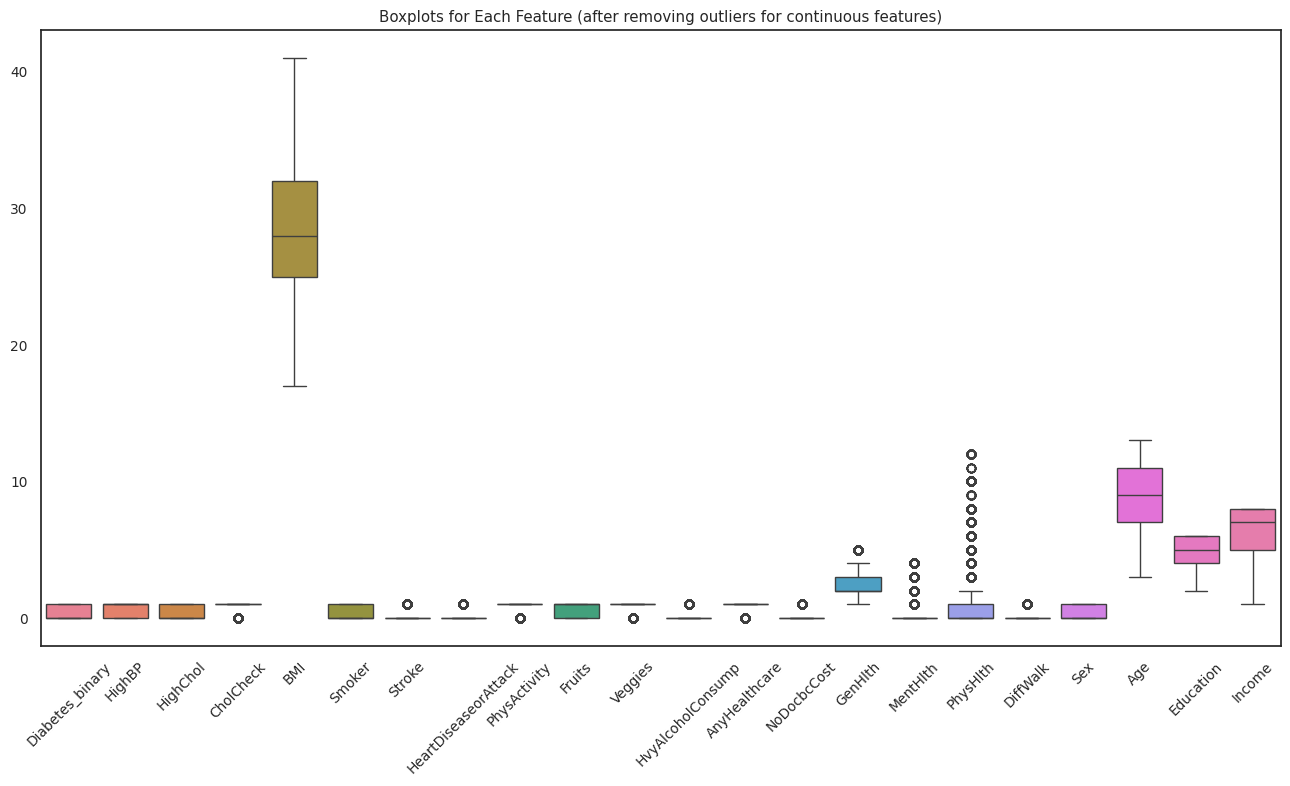

In [ ]:
# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature (after removing outliers for continuous features)')
plt.show()

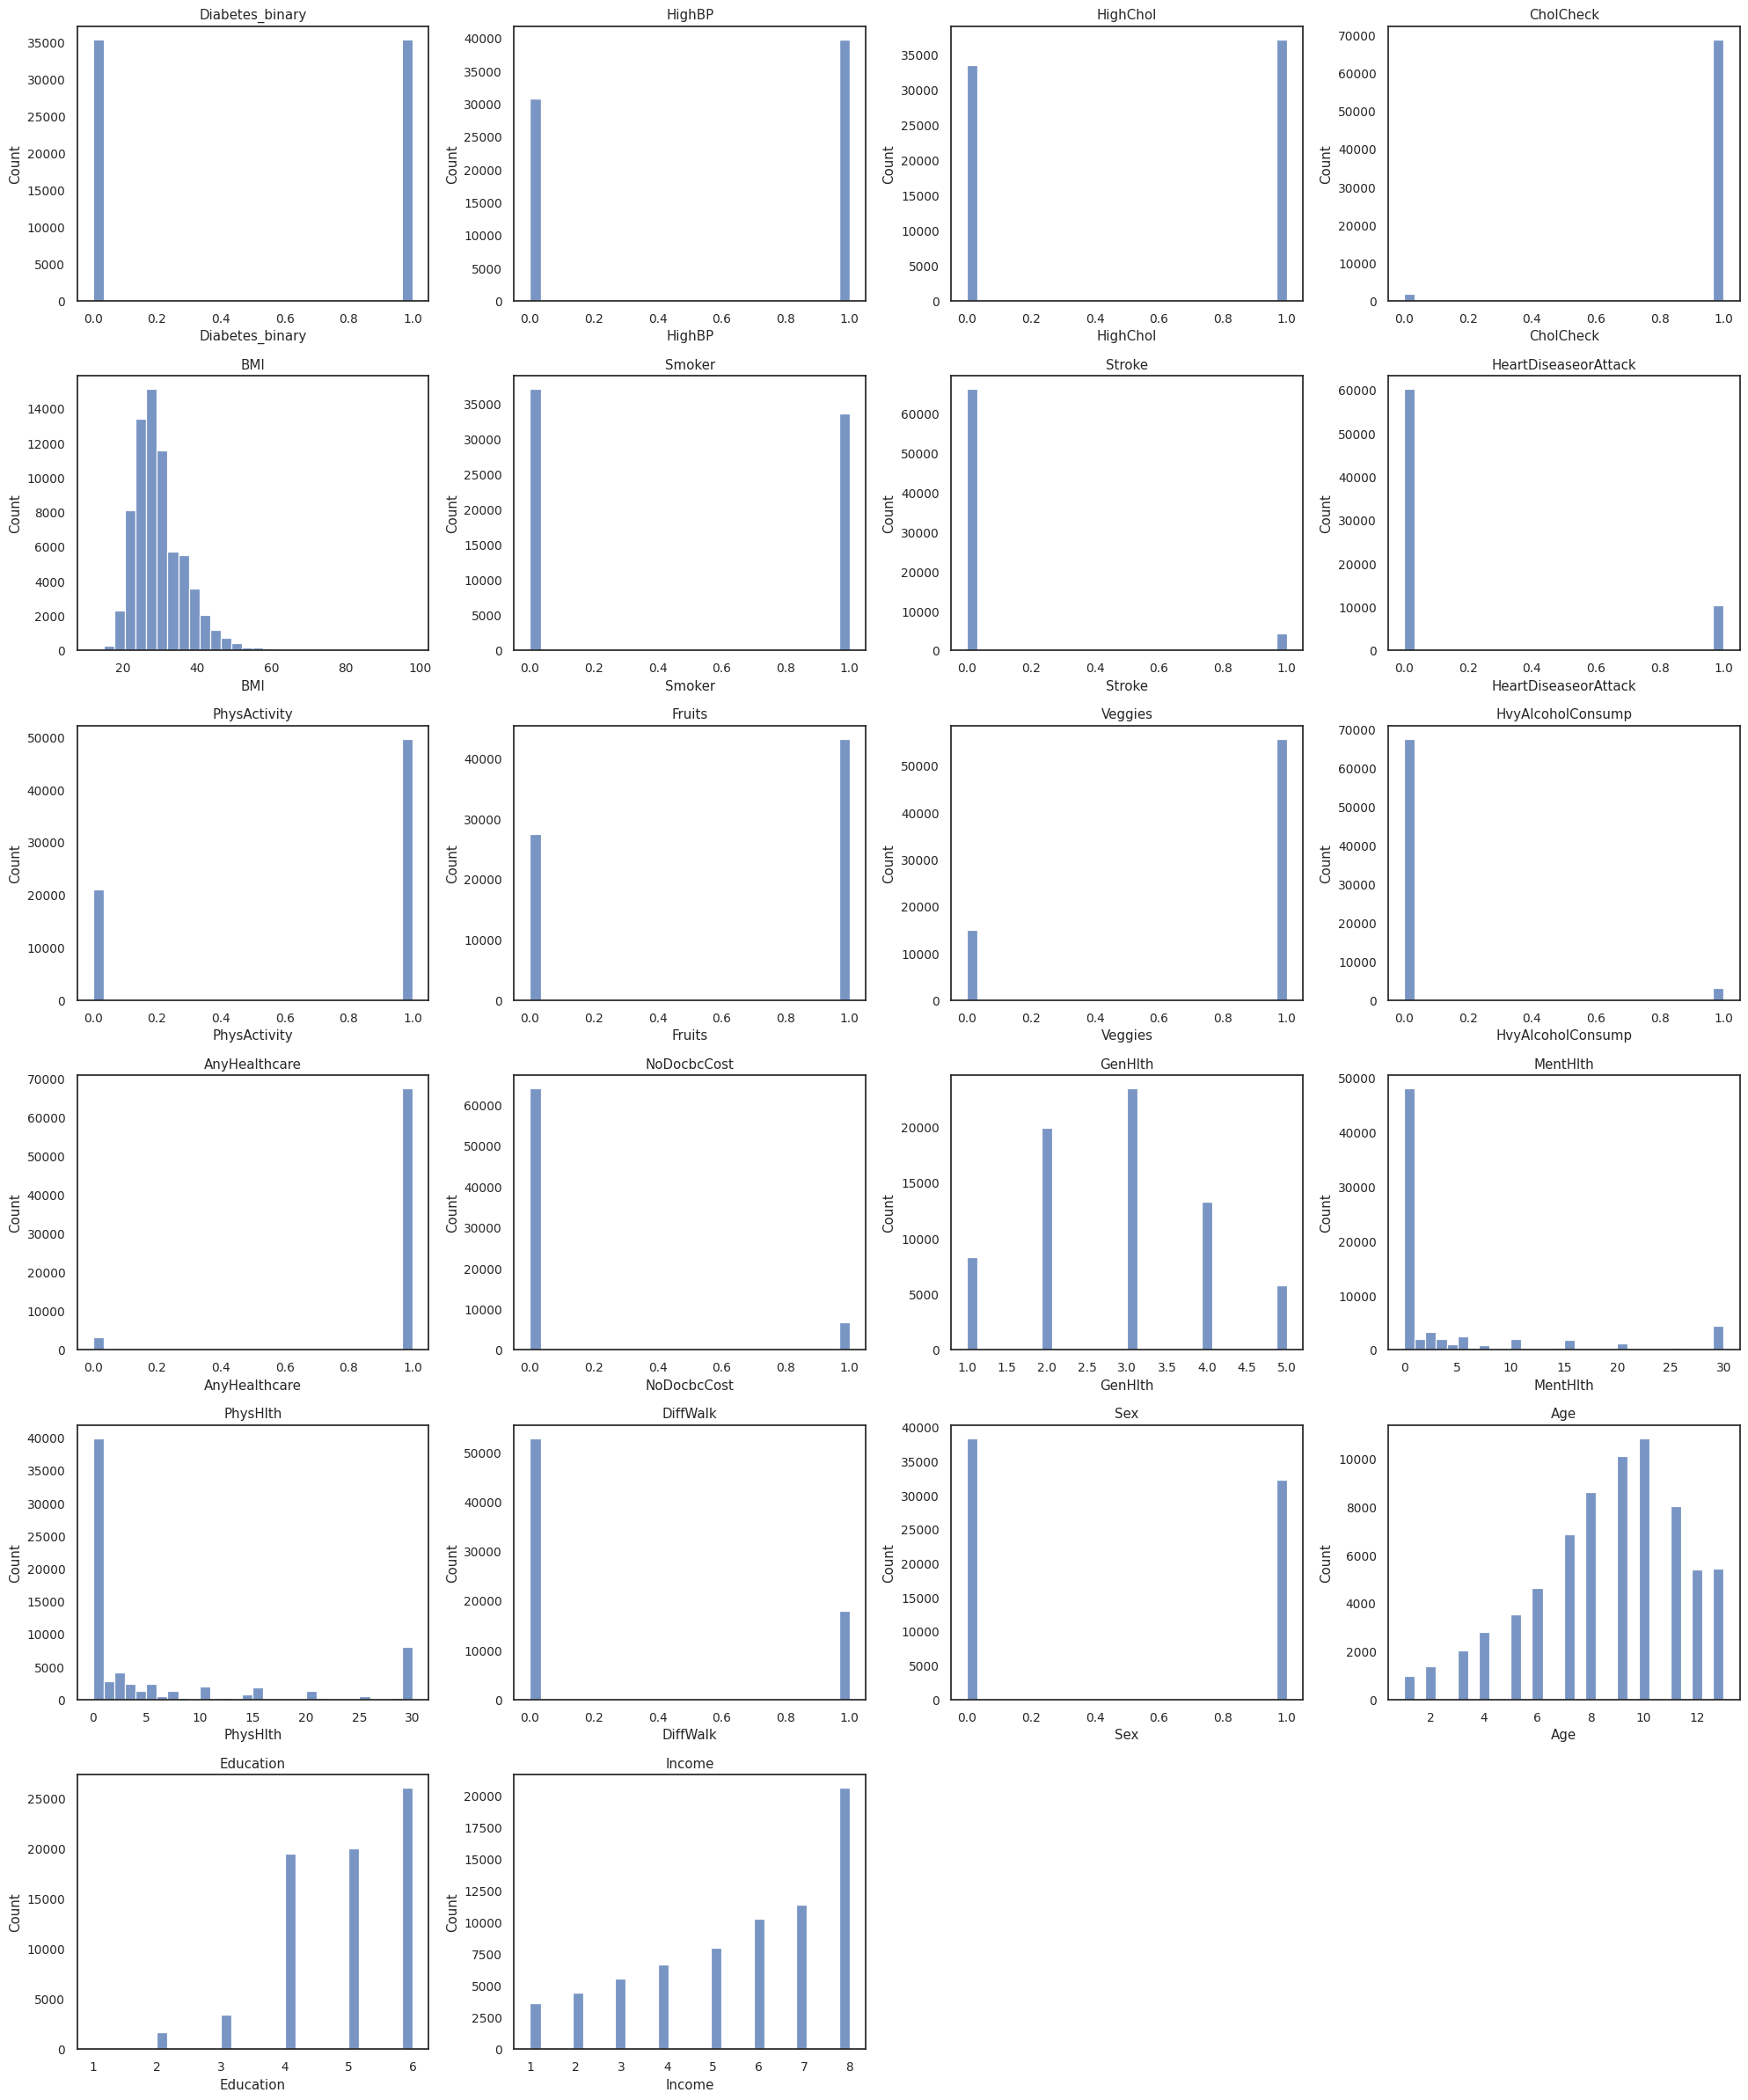

In [ ]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)
    plt.tight_layout()

plt.show()


100%|██████████| 22/22 [00:00<00:00, 38.42it/s] 


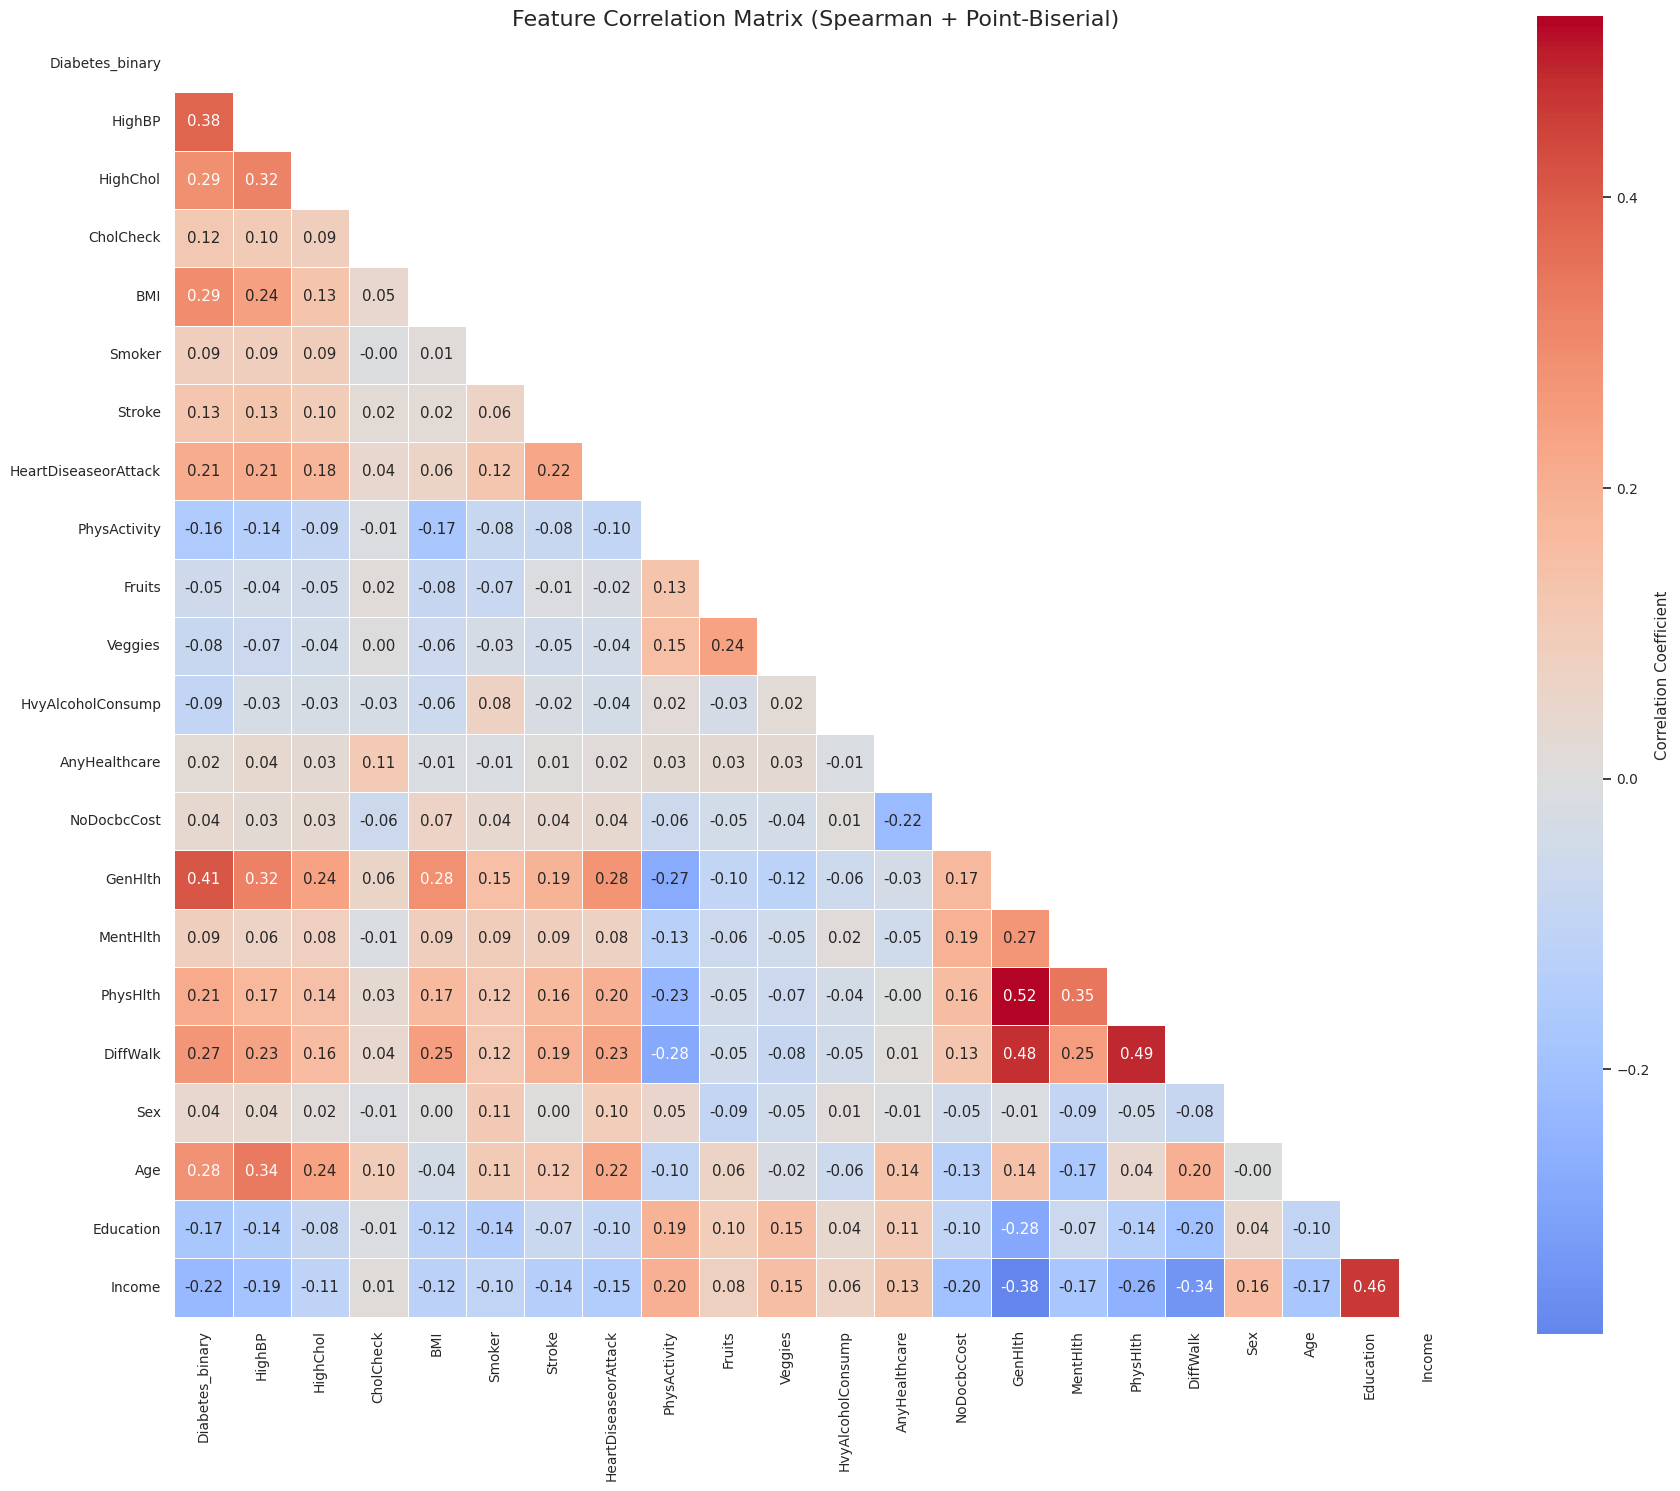

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, pointbiserialr, spearmanr
from tqdm import tqdm

# Load dataset
#url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# Detect binary columns
is_binary = {col: df[col].nunique() == 2 for col in df.columns}

# Initialize correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)

# Compute correlations (lower triangle only)
for i, col1 in enumerate(tqdm(df.columns)):
    for j, col2 in enumerate(df.columns[:i+1]):
        x = df[col1]
        y = df[col2]

        if col1 == col2:
            corr = 1.0
        else:
            try:
                if is_binary[col1] and is_binary[col2]:
                    corr = pearsonr(x, y)[0]  # Phi coefficient
                elif is_binary[col1]:
                    corr = pointbiserialr(y, x)[0]  # y must be continuous
                elif is_binary[col2]:
                    corr = pointbiserialr(x, y)[0]
                else:
                    corr = spearmanr(x, y)[0]  # Use Spearman for non-linear
            except:
                corr = np.nan

        # Fill symmetric entries
        corr_matrix.loc[col1, col2] = corr
        corr_matrix.loc[col2, col1] = corr

# Plotting
plt.figure(figsize=(18, 15))
sns.set(style="white", font_scale=0.9)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
    mask=mask
)

plt.title("Feature Correlation Matrix (Spearman + Point-Biserial)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Target variable correlations
if 'Diabetes_012' in df.columns:
    target_corr = corr_matrix['Diabetes_012'].sort_values(key=abs, ascending=False)
    print("\nTop correlations with Diabetes_012:")
    print(target_corr.head(10))

##**Model A: 3 layers with 8 neurons on origianl dataset (outliers & 21 features)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'# original dataset
# Read CSV
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

# Encode target labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=21, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1427/1427 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8264 - loss: 0.5868 - val_accuracy: 0.8410 - val_loss: 0.4092
Epoch 2/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8423 - loss: 0.4030 - val_accuracy: 0.8417 - val_loss: 0.4043
Epoch 3/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8443 - loss: 0.4006 - val_accuracy: 0.8450 - val_loss: 0.4019
Epoch 4/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8466 - loss: 0.3983 - val_accuracy: 0.8474 - val_loss: 0.4002
Epoch 5/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8489 - loss: 0.3964 - val_accuracy: 0.8483 - val_loss: 0.3991
Epoch 6/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8481 - loss: 0.3975 - val_accuracy: 0.8482 - val_loss: 0.3997
Epoch 7/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8480 - loss: 0.3981 - val_accuracy: 0.8474 - val_loss: 0.3984
Epoch 8/30
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8488 - loss: 0.3957 - val_accurac

##**Model B: 3 layers with 8 neurons on cleaned dataset (21 features)**
###**Hyperparameters**
- dataset: remove outliers, but **no feature selecton** applied
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**categorical crossentropy**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 8


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8808 - loss: 0.4713 - val_accuracy: 0.8763 - val_loss: 0.3592
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8823 - loss: 0.3459 - val_accuracy: 0.8763 - val_loss: 0.3514
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8813 - loss: 0.3421 - val_accuracy: 0.8763 - val_loss: 0.3497
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8823 - loss: 0.3376 - val_accuracy: 0.8763 - val_loss: 0.3487
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8810 - loss: 0.3396 - val_accuracy: 0.8763 - val_loss: 0.3482
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8820 - loss: 0.3352 - val_accuracy: 0.8763 - val_loss: 0.3475
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8824 - loss: 0.3341 - val_accuracy: 0.8763 - val_loss: 0.3474
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8815 - loss: 0.3362 - val_accuracy: 0.8763 - val_

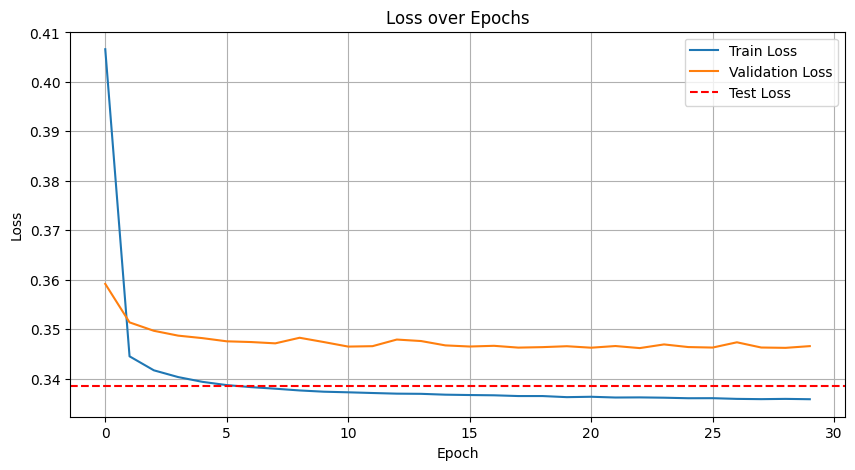

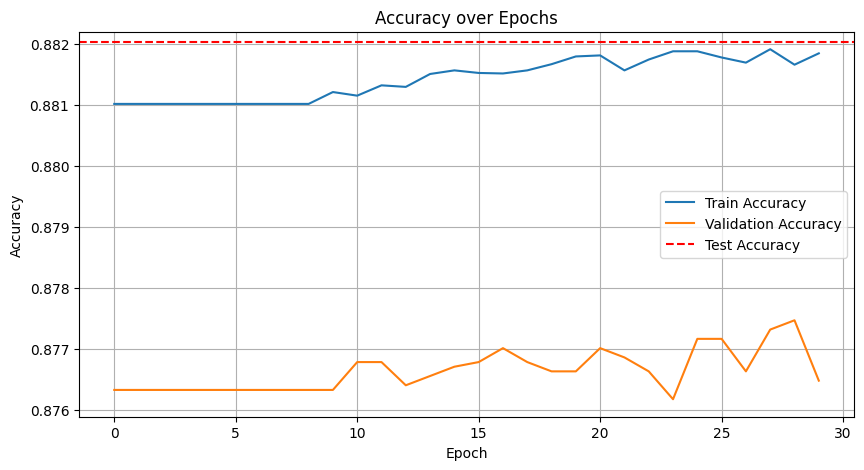

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1PQrL_ergL1pm6zcghtIzoK7L3eLZ-dJ3'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

# Encode target labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=21, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print (test_loss)
print ('---------')
print (test_acc)

0.3412292003631592
------------------------------------------------------------------------------------------
0.881784200668335


##**Model C: 3 layers with 8 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**MSE**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 8


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7963 - loss: 0.1107 - val_accuracy: 0.8763 - val_loss: 0.0700
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8809 - loss: 0.0659 - val_accuracy: 0.8763 - val_loss: 0.0644
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8815 - loss: 0.0620 - val_accuracy: 0.8763 - val_loss: 0.0640
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8810 - loss: 0.0618 - val_accuracy: 0.8763 - val_loss: 0.0640
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8817 - loss: 0.0617 - val_accuracy: 0.8763 - val_loss: 0.0637
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8808 - loss: 0.0617 - val_accuracy: 0.8763 - val_loss: 0.0636
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8803 - loss: 0.0618 - val_accuracy: 0.8763 - val_loss: 0.0636
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8813 - loss: 0.0615 - val_accuracy: 0.8763 - val_

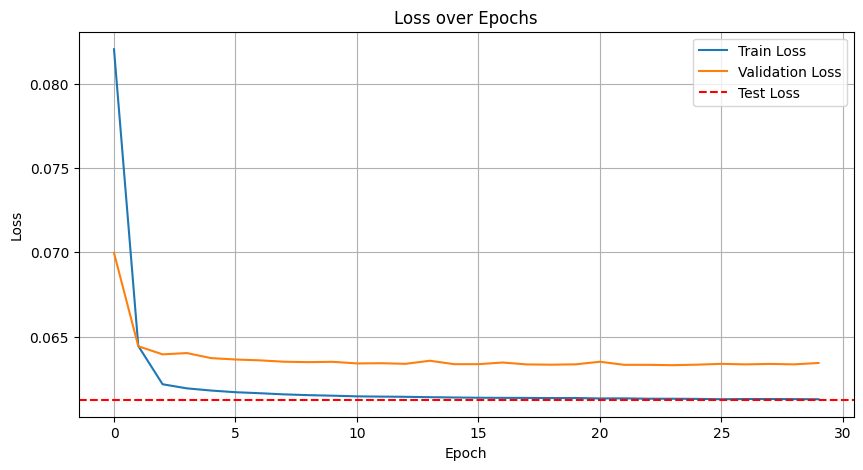

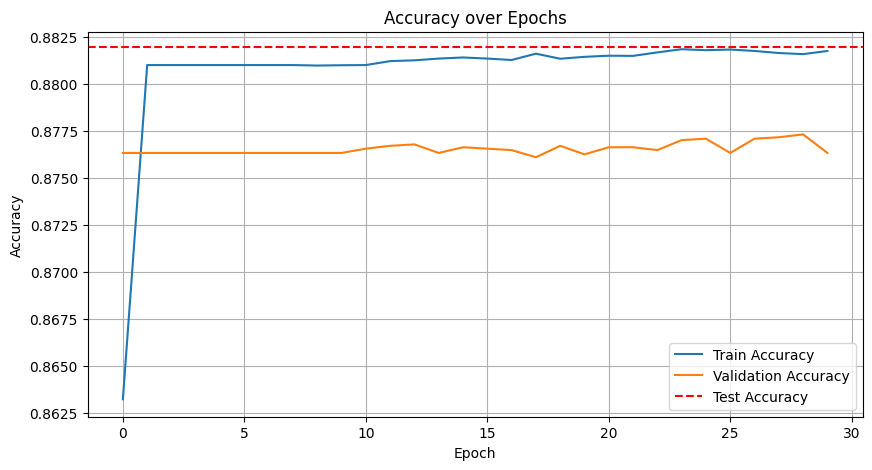

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print (test_loss)
print ('---------')
print (test_acc)

0.3410887122154236
---------
0.8821794390678406


##**Model D: 3 layers with 8 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**categorical crossentropy**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 8


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8024 - loss: 0.5513 - val_accuracy: 0.8763 - val_loss: 0.3834
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8808 - loss: 0.3639 - val_accuracy: 0.8763 - val_loss: 0.3566
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8811 - loss: 0.3484 - val_accuracy: 0.8763 - val_loss: 0.3530
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8791 - loss: 0.3496 - val_accuracy: 0.8763 - val_loss: 0.3515
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8806 - loss: 0.3429 - val_accuracy: 0.8763 - val_loss: 0.3503
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8809 - loss: 0.3395 - val_accuracy: 0.8763 - val_loss: 0.3499
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8808 - loss: 0.3429 - val_accuracy: 0.8763 - val_loss: 0.3492
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8804 - loss: 0.3415 - val_accuracy: 0.8763 - val_

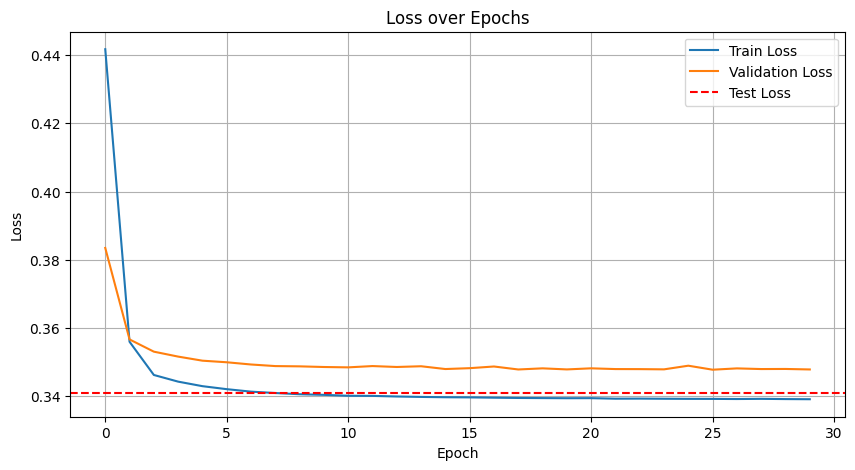

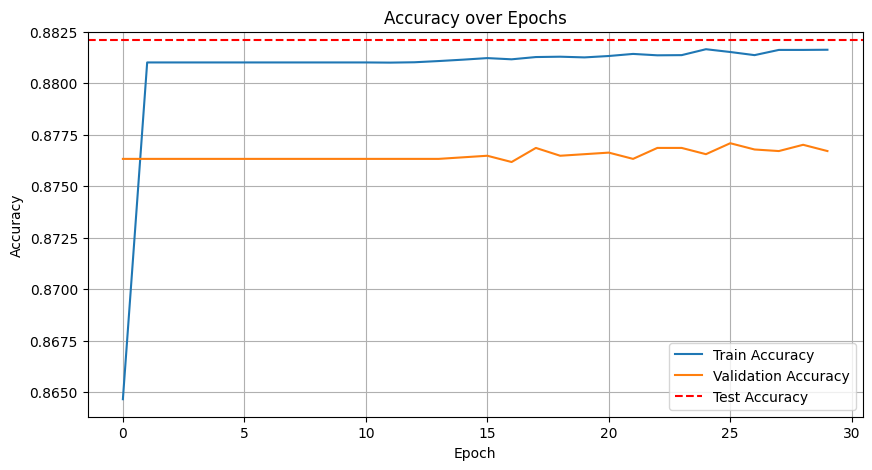

0.3409290909767151
---------
0.8821186423301697


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print (test_loss)
print ('---------')
print (test_acc)


##**Model E: 3 layers with 16 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**categorical crossentropy**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 16


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8707 - loss: 0.4625 - val_accuracy: 0.8763 - val_loss: 0.3544
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8814 - loss: 0.3433 - val_accuracy: 0.8763 - val_loss: 0.3512
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8807 - loss: 0.3434 - val_accuracy: 0.8763 - val_loss: 0.3496
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8817 - loss: 0.3403 - val_accuracy: 0.8763 - val_loss: 0.3492
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8810 - loss: 0.3408 - val_accuracy: 0.8763 - val_loss: 0.3487
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8818 - loss: 0.3400 - val_accuracy: 0.8763 - val_loss: 0.3486
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8810 - loss: 0.3418 - val_accuracy: 0.8763 - val_loss: 0.3482
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8835 - loss: 0.3353 - val_accuracy: 0.8763 - val

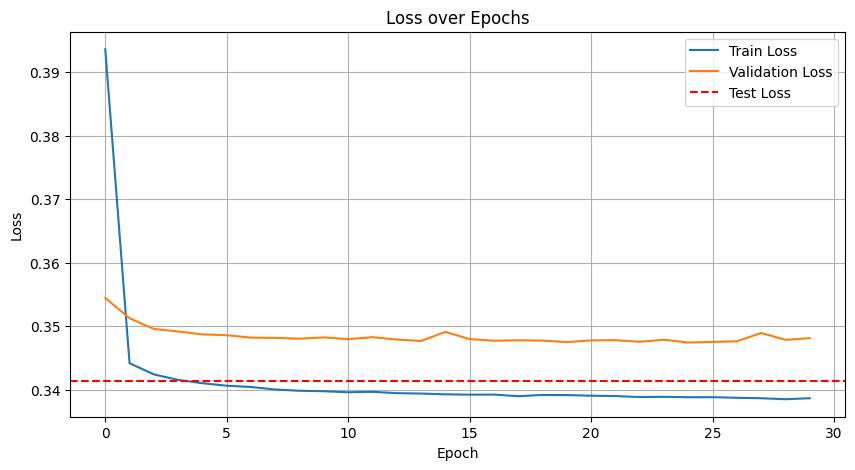

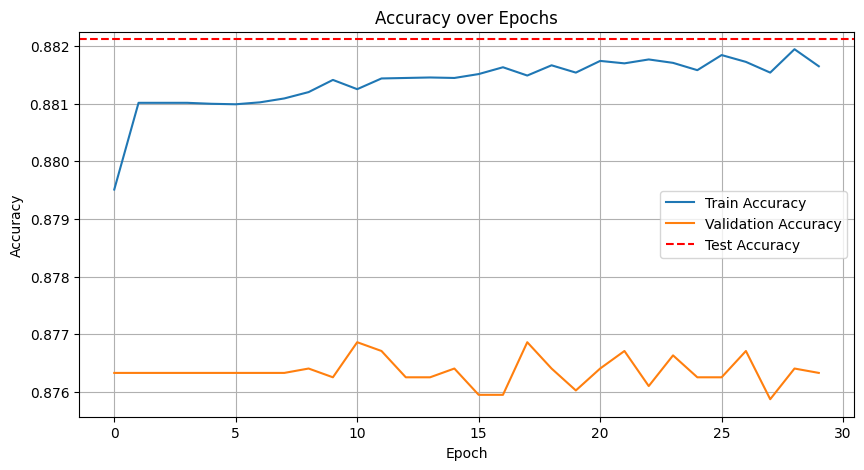

0.3413671553134918
---------
0.8821186423301697


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                # Second hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print (test_loss)
print ('---------')
print (test_acc)


##**Model F: 3 layers with 16 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 128
- loss function:**MSE**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 16


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8818 - loss: 0.0886 - val_accuracy: 0.8763 - val_loss: 0.0647
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8817 - loss: 0.0620 - val_accuracy: 0.8763 - val_loss: 0.0638
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8803 - loss: 0.0623 - val_accuracy: 0.8763 - val_loss: 0.0637
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8816 - loss: 0.0617 - val_accuracy: 0.8763 - val_loss: 0.0635
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8806 - loss: 0.0615 - val_accuracy: 0.8763 - val_loss: 0.0636
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8807 - loss: 0.0611 - val_accuracy: 0.8761 - val_loss: 0.0634
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8825 - loss: 0.0610 - val_accuracy: 0.8762 - val_loss: 0.0635
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8806 - loss: 0.0620 - val_accuracy: 0.

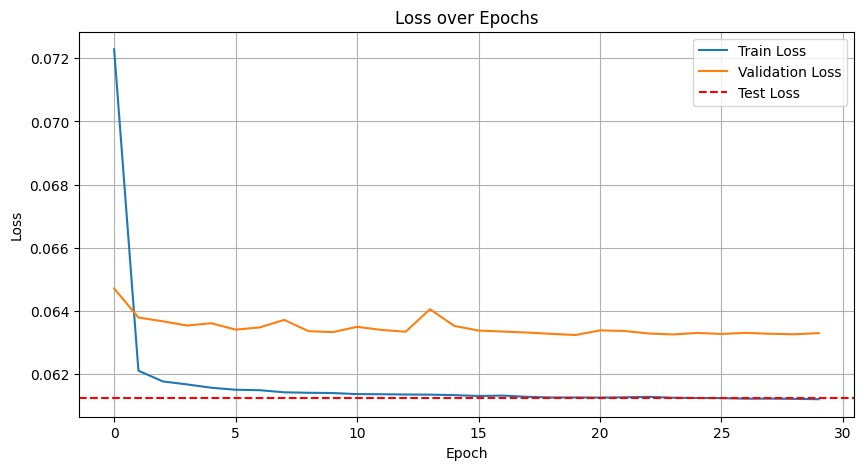

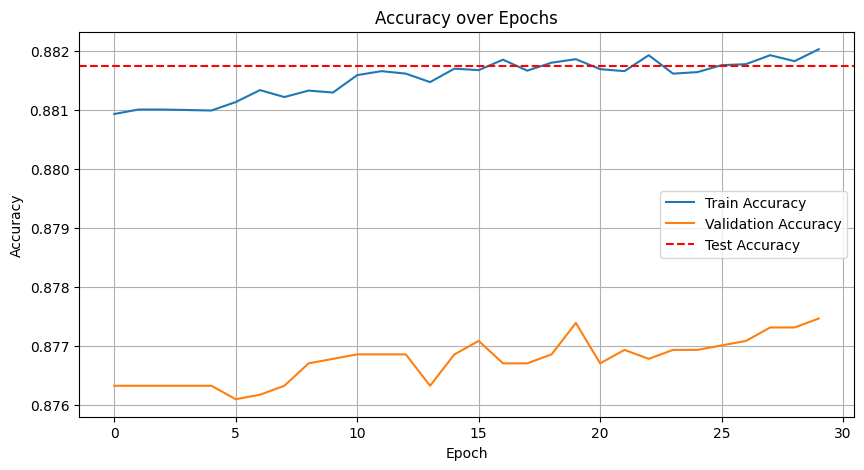

0.06125742569565773
---------
0.8817538022994995


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                # Second hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print (test_loss)
print ('---------')
print (test_acc)


##**Model G: 3 layers with 16 neurons on cleaned dataset (13 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 64
- loss function:**ce**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 16


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1850/1850 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8814 - loss: 0.3941 - val_accuracy: 0.8763 - val_loss: 0.3518
Epoch 2/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8820 - loss: 0.3401 - val_accuracy: 0.8763 - val_loss: 0.3497
Epoch 3/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8814 - loss: 0.3403 - val_accuracy: 0.8763 - val_loss: 0.3489
Epoch 4/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8811 - loss: 0.3406 - val_accuracy: 0.8765 - val_loss: 0.3487
Epoch 5/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8808 - loss: 0.3423 - val_accuracy: 0.8768 - val_loss: 0.3484
Epoch 6/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8816 - loss: 0.3412 - val_accuracy: 0.8763 - val_loss: 0.3486
Epoch 7/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8806 - loss: 0.3418 - val_accuracy: 0.8763 - val_loss: 0.3497
Epoch 8/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8810 - loss: 0.3393 - val_accurac

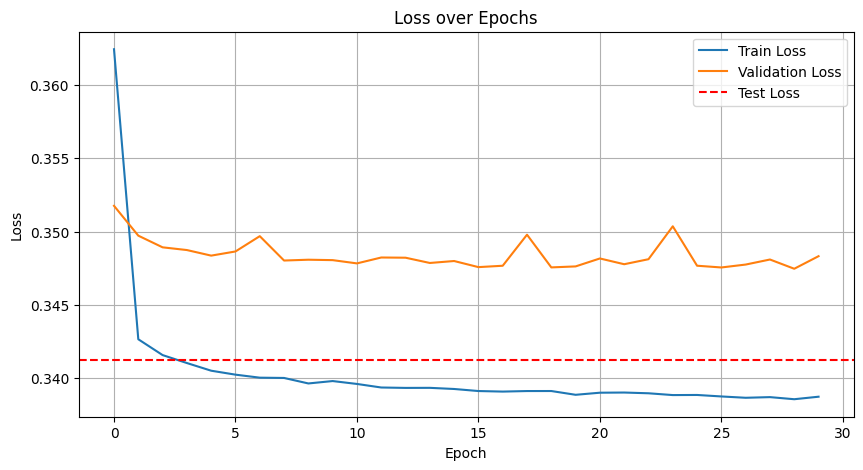

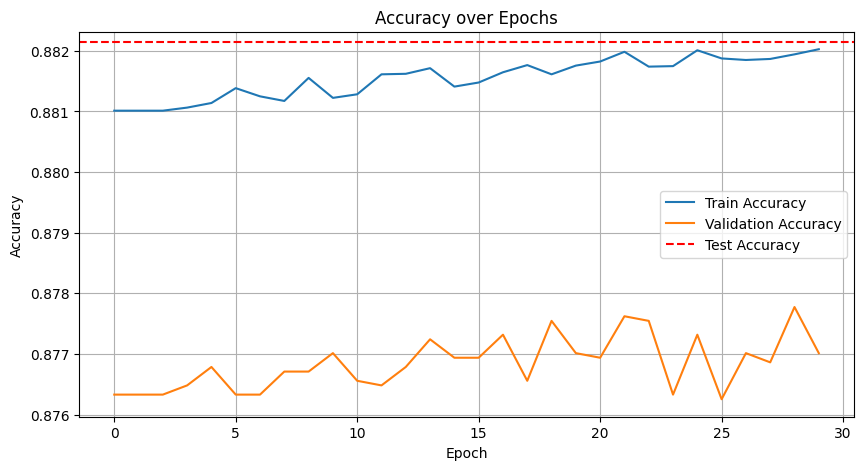

0.34125012159347534
---------
0.8821490406990051


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                # Second hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

# ---- Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Extract training and validation history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# ---- Plot Loss ----
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print (test_loss)
print ('---------')
print (test_acc)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Corrected direct download link
url = 'https://drive.google.com/uc?id=1bIe9Hx45bshM4XMOvRv3tGB7mIOl7hgy'
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 13 columns
X = df.iloc[:, 1:].values

# Encode target labels


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(16, input_dim=13, activation='sigmoid'))   # First hidden layer
model.add(Dense(16, activation='sigmoid'))                # Second hidden layer
model.add(Dense(16, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

# --- Evaluate on test set ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1850/1850 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8809 - loss: 0.4308 - val_accuracy: 0.8763 - val_loss: 0.3513
Epoch 2/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8822 - loss: 0.3400 - val_accuracy: 0.8763 - val_loss: 0.3500
Epoch 3/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8821 - loss: 0.3409 - val_accuracy: 0.8763 - val_loss: 0.3496
Epoch 4/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8818 - loss: 0.3414 - val_accuracy: 0.8763 - val_loss: 0.3492
Epoch 5/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8801 - loss: 0.3410 - val_accuracy: 0.8763 - val_loss: 0.3484
Epoch 6/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8798 - loss: 0.3437 - val_accuracy: 0.8768 - val_loss: 0.3484
Epoch 7/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8806 - loss: 0.3424 - val_accuracy: 0.8767 - val_loss: 0.3480
Epoch 8/30
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8813 - loss: 0.3403 - val_accur

##**Model Z: 4 layers with 16 neurons on cleaned 5050


dataset (14 features)**
###**Hyperparameters**
- dataset: cleaned dataset & feature selection, without outliers and 13 features
- learning rate:0.001
- epoch number: 30
- training data size : 75%
- batch size: 64
- loss function:**MSE**
- activation function in hidden layers w/o output layer: sigmoid
- activation function in output layer: softmax
- number of layers: 3 (one for input, one for training, one for output)
- number of neurons per layer: 16


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# --- Features and target ---
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

# --- Encode target ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build model ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

# --- Compile model ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Train model ---
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

# --- Evaluate on test set ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")


Epoch 1/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6532 - loss: 0.6400 - val_accuracy: 0.7486 - val_loss: 0.5149
Epoch 2/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7455 - loss: 0.5173 - val_accuracy: 0.7475 - val_loss: 0.5116
Epoch 3/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7492 - loss: 0.5098 - val_accuracy: 0.7488 - val_loss: 0.5089
Epoch 4/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7493 - loss: 0.5103 - val_accuracy: 0.7486 - val_loss: 0.5097
Epoch 5/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7520 - loss: 0.5047 - val_accuracy: 0.7496 - val_loss: 0.5082
Epoch 6/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7505 - loss: 0.5073 - val_accuracy: 0.7468 - val_loss: 0.5079
Epoch 7/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7526 - loss: 0.5064 - val_accuracy: 0.7456 - val_loss: 0.5083
Epoch 8/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7461 - loss: 0.5108 - val_accuracy: 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# --- Features and target ---
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

# --- Encode target ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build model ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# --- Compile model ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Train model ---
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

# --- Evaluate on test set ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")


Epoch 1/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7040 - loss: 0.5705 - val_accuracy: 0.7413 - val_loss: 0.5153
Epoch 2/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7446 - loss: 0.5138 - val_accuracy: 0.7422 - val_loss: 0.5103
Epoch 3/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7498 - loss: 0.5092 - val_accuracy: 0.7431 - val_loss: 0.5085
Epoch 4/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7527 - loss: 0.5047 - val_accuracy: 0.7454 - val_loss: 0.5063
Epoch 5/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7538 - loss: 0.5027 - val_accuracy: 0.7463 - val_loss: 0.5066
Epoch 6/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7543 - loss: 0.4996 - val_accuracy: 0.7438 - val_loss: 0.5066
Epoch 7/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7575 - loss: 0.4984 - val_accuracy: 0.7447 - val_loss: 0.5057
Epoch 8/30
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7550 - loss: 0.4998 - val_accuracy: 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# --- Features and target ---
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

# --- Encode target ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build model ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

# --- Compile model ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Train model ---
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

# --- Evaluate on test set ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


# --- Get predictions ---
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# If binary classification (2 classes), extract TP, TN, FP, FN
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel()
    print(f"\nFalse Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
else:
    print("\nNote: Multiclass confusion matrix shown above. TP/FN/FP/TN are only available for binary classification.")


Epoch 1/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6960 - loss: 0.5853 - val_accuracy: 0.7472 - val_loss: 0.5120
Epoch 2/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7502 - loss: 0.5109 - val_accuracy: 0.7495 - val_loss: 0.5080
Epoch 3/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7511 - loss: 0.5082 - val_accuracy: 0.7504 - val_loss: 0.5054
Epoch 4/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7545 - loss: 0.5009 - val_accuracy: 0.7516 - val_loss: 0.5028
Epoch 5/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7555 - loss: 0.5014 - val_accuracy: 0.7527 - val_loss: 0.5010
Epoch 6/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7544 - loss: 0.5035 - val_accuracy: 0.7532 - val_loss: 0.5008
Epoch 7/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7572 - loss: 0.4978 - val_accuracy: 0.7528 - val_loss: 0.5004
Epoch 8/50
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7557 - loss: 0.5004 - val_accuracy: 0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# --- Extract features and target ---
y = df.iloc[:, 0].values  # target in first column
X = df.iloc[:, 1:].values

# --- Encode target (assumes binary classification: 'normal' and 'malware') ---
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)  # just 0 or 1

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build model ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train ---
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# --- Evaluate ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# --- Predictions ---
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# --- Classification report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "malware"]))



Epoch 1/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7107 - loss: 0.5579 - val_accuracy: 0.7498 - val_loss: 0.5082
Epoch 2/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7506 - loss: 0.5077 - val_accuracy: 0.7479 - val_loss: 0.5048
Epoch 3/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7529 - loss: 0.5034 - val_accuracy: 0.7514 - val_loss: 0.5035
Epoch 4/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7537 - loss: 0.5013 - val_accuracy: 0.7486 - val_loss: 0.5038
Epoch 5/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7541 - loss: 0.5012 - val_accuracy: 0.7496 - val_loss: 0.5029
Epoch 6/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7542 - loss: 0.4977 - val_accuracy: 0.7498 - val_loss: 0.5065
Epoch 7/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7531 - loss: 0.5038 - val_accuracy: 0.7504 - val_loss: 0.5038
Epoch 8/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7547 - loss: 0.5011 - 

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "malware"]))


[[4934 2156]
 [1364 5685]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.78      0.70      0.74      7090
     malware       0.73      0.81      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# --- Extract features and target ---
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

# --- Encode target labels as 0/1 ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # e.g., "normal" → 0, "malware" → 1

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# --- Feature scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Train logistic regression model ---
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# --- Predict on test set ---
y_pred = logreg.predict(X_test)

# --- Evaluate on test set ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# --- Confusion matrix and classification report ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

target_names = [str(c) for c in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Test Loss: 0.5049
Test Accuracy: 0.7510

Confusion Matrix:
[[5156 1934]
 [1623 5426]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# --- Extract features and target ---
y = df.iloc[:, 0].values  # target in first column
X = df.iloc[:, 1:].values

# --- Encode target (binary classification: 'normal' and 'malware') ---
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build model with L2 regularization ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

# --- Compile model ---
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train model ---
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# --- Evaluate model ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# --- Predictions ---
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "malware"]))


Epoch 1/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7030 - loss: 0.5953 - val_accuracy: 0.7459 - val_loss: 0.5299
Epoch 2/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7528 - loss: 0.5230 - val_accuracy: 0.7495 - val_loss: 0.5198
Epoch 3/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7533 - loss: 0.5163 - val_accuracy: 0.7473 - val_loss: 0.5157
Epoch 4/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7498 - loss: 0.5192 - val_accuracy: 0.7539 - val_loss: 0.5108
Epoch 5/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7549 - loss: 0.5094 - val_accuracy: 0.7458 - val_loss: 0.5142
Epoch 6/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7533 - loss: 0.5128 - val_accuracy: 0.7518 - val_loss: 0.5104
Epoch 7/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7517 - loss: 0.5120 - val_accuracy: 0.7493 - val_loss: 0.5109
Epoch 8/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7555 - loss: 0.5077 - 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# --- Extract features and target ---
y = df.iloc[:, 0].values  # target in first column
X = df.iloc[:, 1:].values

# --- Encode target (binary classification: 'normal' and 'malware') ---
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build model with L2 regularization ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(16, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

# --- Compile model ---
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train model ---
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# --- Evaluate model ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# --- Predictions ---
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "malware"]))


Epoch 1/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7208 - loss: 0.5822 - val_accuracy: 0.7463 - val_loss: 0.5315
Epoch 2/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7529 - loss: 0.5243 - val_accuracy: 0.7465 - val_loss: 0.5211
Epoch 3/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7545 - loss: 0.5144 - val_accuracy: 0.7495 - val_loss: 0.5166
Epoch 4/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7529 - loss: 0.5169 - val_accuracy: 0.7537 - val_loss: 0.5127
Epoch 5/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7532 - loss: 0.5144 - val_accuracy: 0.7486 - val_loss: 0.5127
Epoch 6/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7526 - loss: 0.5119 - val_accuracy: 0.7525 - val_loss: 0.5083
Epoch 7/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7533 - loss: 0.5118 - val_accuracy: 0.7518 - val_loss: 0.5087
Epoch 8/30
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7513 - loss: 0.5116 - 

## 5050 Uncleaned dataset.
random forest,
abnoraml detection


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1-OKEw9mQK0tt8Z75n-VNi9Ed8htnhA7W'
df = pd.read_csv(url)

# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1


# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]


# --- Extract features and target ---
y = df_clean.iloc[:, 0].values  # target in first column
X = df_clean.iloc[:, 1:].values

# --- Encode target (binary classification: 'normal' and 'malware') ---
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build model with L2 regularization ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='sigmoid', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

# --- Compile model ---
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train model ---
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# --- Evaluate model ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# --- Predictions ---
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "malware"]))


Binary columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Continuous columns: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Epoch 1/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6415 - loss: 0.6547 - val_accuracy: 0.7326 - val_loss: 0.5525
Epoch 2/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7312 - loss: 0.5557 - val_accuracy: 0.7331 - val_loss: 0.5400
Epoch 3/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7393 - loss: 0.5439 - val_accuracy: 0.7284 - val_loss: 0.5415
Epoch 4/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7411 - loss: 0.5414 - val_accuracy: 0.7351 - val_loss: 0.5344
Epoch 5/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7385 - loss: 0.5363 - val_accuracy: 0.7373 - val_loss: 0.5327
Epoch 6/30
1022/1022 ━━━━━━━━━━━━

In [4]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1NoadYkeHLzPTbmsVp1hc_QHgRa6rejXl'
df = pd.read_csv(url)


# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1


# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]


# --- Extract features and target ---
y = df_clean.iloc[:, 0].values  # target in first column
X = df_clean.iloc[:, 1:].values

# --- Encode target (binary classification: 'normal' and 'malware') ---
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build model with L2 regularization ---
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='sigmoid', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

# --- Compile model ---
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train model ---
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# --- Evaluate model ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# --- Predictions ---
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "malware"]))


Binary columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'DiffWalk']
Continuous columns: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Epoch 1/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6270 - loss: 0.6532 - val_accuracy: 0.7268 - val_loss: 0.5471
Epoch 2/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7354 - loss: 0.5444 - val_accuracy: 0.7276 - val_loss: 0.5383
Epoch 3/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7343 - loss: 0.5427 - val_accuracy: 0.7296 - val_loss: 0.5351
Epoch 4/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7345 - loss: 0.5366 - val_accuracy: 0.7318 - val_loss: 0.5346
Epoch 5/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7334 - loss: 0.5433 - val_accuracy: 0.7304 - val_loss: 0.5329
Epoch 6/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7370 - loss: 0.5343 - val_accuracy: 0.7287 - val_loss: 0.5330
Epoch 7/30
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - a

In [6]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1NoadYkeHLzPTbmsVp1hc_QHgRa6rejXl'
df = pd.read_csv(url)


# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1


# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]


# --- Extract features and target ---
y = df_clean.iloc[:, 0].values  # target in first column
X = df_clean.iloc[:, 1:].values


# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Train logistic regression model ---
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# --- Predict on test set ---
y_pred = logreg.predict(X_test)

# --- Evaluate on test set ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# --- Confusion matrix and classification report ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

target_names = [str(c) for c in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Binary columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'DiffWalk']
Continuous columns: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Test Loss: 0.5464
Test Accuracy: 0.7290

Confusion Matrix:
[[3753 1227]
 [1256 2840]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4980
           1       0.70      0.69      0.70      4096

    accuracy                           0.73      9076
   macro avg       0.72      0.72      0.72      9076
weighted avg       0.73      0.73      0.73      9076



In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1NoadYkeHLzPTbmsVp1hc_QHgRa6rejXl'
df = pd.read_csv(url)

# --- Identify binary and continuous columns ---
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

'''
# --- Remove outliers using 1.5*IQR rule ---
Q1 = df[continuous_cols].quantile(0.25)
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df[continuous_cols] >= (Q1 - 1.5 * IQR)) & (df[continuous_cols] <= (Q3 + 1.5 * IQR))).all(axis=1)
df_clean = df[outlier_mask]

# --- Extract features and target ---
y = df_clean.iloc[:, 0].values  # target in first column
X = df_clean.iloc[:, 1:].values
'''
y = df.iloc[:, 0].values  # target in first column
X = df.iloc[:, 1:].values
# --- Encode target if not already 0/1 ---
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # this guarantees numeric labels (0/1)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Train Random Forest Classifier ---
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# --- Predict and evaluate ---
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("[Random Forest Classifier]")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ✅ Convert target names to strings to avoid TypeError
target_names = [str(label) for label in label_encoder.classes_]
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


[Random Forest Classifier]
Accuracy: 0.7153971285097956
ROC AUC: 0.7818640961986625

Confusion Matrix:
 [[4834 2256]
 [1768 5281]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.71      7090
           1       0.70      0.75      0.72      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


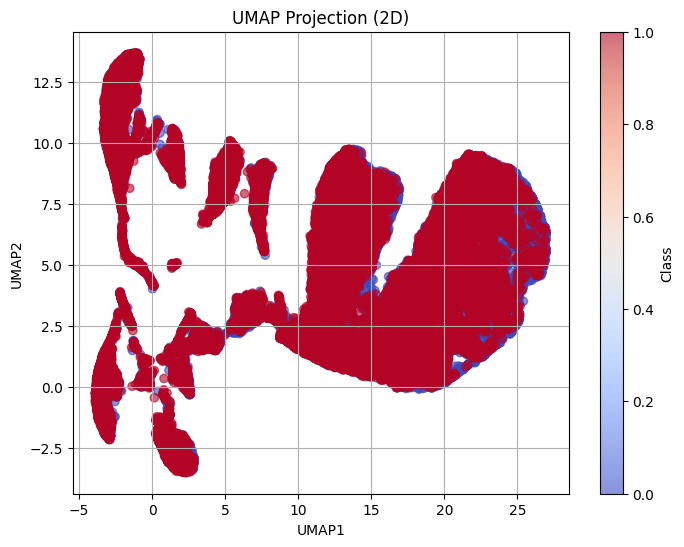

In [11]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("UMAP Projection (2D)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar(scatter, label="Class")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import umap.umap_ as umap
import matplotlib.pyplot as plt

# --- Load dataset ---
url = 'https://drive.google.com/uc?id=1NoadYkeHLzPTbmsVp1hc_QHgRa6rejXl'
df = pd.read_csv(url)

# --- Identify binary and continuous columns ---
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

# --- Remove outliers using 1.5*IQR rule ---
Q1 = df[continuous_cols].quantile(0.25)
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df[continuous_cols] >= (Q1 - 1.5 * IQR)) & (df[continuous_cols] <= (Q3 + 1.5 * IQR))).all(axis=1)
df_clean = df[outlier_mask]

# --- Extract features and target ---
y = df_clean.iloc[:, 0].values  # target in first column
X = df_clean.iloc[:, 1:].values

# --- Encode target if not already numeric ---
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)  # for UMAP later

# ============================
# 🌲 RANDOM FOREST
# ============================
rf = RandomForestClassifier(n_estimators=400, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("\n===== Random Forest Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=[str(c) for c in label_encoder.classes_]))

# ============================
# 🚀 XGBOOST
# ============================
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

print("\n===== XGBoost Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=[str(c) for c in label_encoder.classes_]))

# ============================
# 📊 UMAP Visualization
# ============================
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("UMAP Projection (2D)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar(scatter, label="Class")
plt.grid(True)
plt.show()



===== Random Forest Results =====
Accuracy: 0.7105898252727098
ROC AUC: 0.7804065336632501
Confusion Matrix:
 [[4099 1574]
 [1424 3262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      5673
           1       0.67      0.70      0.69      4686

    accuracy                           0.71     10359
   macro avg       0.71      0.71      0.71     10359
weighted avg       0.71      0.71      0.71     10359



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



===== XGBoost Results =====
Accuracy: 0.7361714451201854
ROC AUC: 0.8114469149077113
Confusion Matrix:
 [[4226 1447]
 [1286 3400]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76      5673
           1       0.70      0.73      0.71      4686

    accuracy                           0.74     10359
   macro avg       0.73      0.74      0.73     10359
weighted avg       0.74      0.74      0.74     10359



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
